In [25]:
# setup
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
display(HTML(open('rise.css').read()))

# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 8)})


# CMPS 2200
# Introduction to Algorithms

## Overview


Today's agenda:

- Introductions
- Motivation for course
- Formalisms used throughout the course
- Navigating the course

## What is an algorithm?

>  an explicit, precise, unambiguous, mechanically-executable sequence of elementary instructions, usually intended to accomplish a specific purpose.

-- [Jeff Erickson](https://jeffe.cs.illinois.edu/teaching/algorithms/)

Examples?

### BOB(n):  

- for i n down to 1  
  - Sing “i bottles of beer on the wall, $i$ bottles of beer,”  
  - Sing “Take one down, pass it around, $i-1$ bottles of beer on the wall.”  
- Sing “No bottles of beer on the wall, no bottles of beer,”  
- Sing “Go to the store, buy some more, n bottles of beer on the wall.”  


Examples of algorithm-like things that are not algorithms?

### BeAMillionaireAndNeverPayTaxes():
- Get a million dollars.
- If the tax man comes to your door and says, “You have never paid taxes!”
  - Say “I forgot.”

## What makes a good algorithm?

- correct
- user-friendly
- many features
- robust
- simple
- secure
- low programmer cost
- **efficient**
  - runs quickly
  - requires little memory

## Then, why study efficiency?

- separates feasible from infeasible
- correlates with user-friendliness

> #### What if it took Google took 2 minutes to return results?

Simple warmup: **What does this do?**

In [26]:
def my_function(a, b):
    for i,v in enumerate(a):
        if v == b:
            return i
    return -1

In [27]:
def linear_search(mylist, key):
    """
    Args:
      mylist...a list
      key......a search key
    Returns:
      index of key in mylist; -1 if not present
    """
    for i,v in enumerate(mylist):
        if v == key:
            return i
    return -1
 
linear_search([5,1,10,7,12,4,2], 12)

4

What factors affect the running time of this algorithm?

- Input **size**
- Input **values**: is key at start or end?
- Hardware!
  - TI-85 vs. Supercomputer

#### We need a way to compare the efficiency of algorithms that abstracts away details of hardware and input.

### Analysis of Linear Search, the long way

- Assign a time cost $c_i$ to each line $i$.
- Figure out how often each line is run $n_i$
- total cost is the cost of each line multiplied by the number of times it is run

<br>

$
\hbox{Cost(linear-search, mylist, key)} = \sum_i c_i * n_i
$

In [28]:
def linear_search(mylist, key):        #   cost         number of times run
    for i,v in enumerate(mylist):      #   c1               ?
        if v == key:                   #   c2               ?
            return i                   #   c3               ?
    return -1                          #   c4               ?

### Best/Average/Worst case

To deal with the effects of the input values on performance, we can consider three types of analysis:

- **Worst-case**: maximum time for any input of size $n$


```python
linear_search([5,1,10,7,12,4,2], 9999)
```

- **Best case**: minimum time of any input of size $n$

```python
linear_search([5,1,10,7,12,4,2], 5)
```

- **Average case**: expected time over all inputs of size *n*
    - Need some probability distribution over inputs

```python
for (mylist, key) in ???:
    linear_search(mylist, key)
```

### Worst-case analysis of linear search

Assume $n \leftarrow$ `len(mylist)`

In [29]:
def linear_search(mylist, key):        #   cost         number of times run
    for i,v in enumerate(mylist):      #   c1               ?
        if v == key:                   #   c2               ?
            return i                   #   c3               ?
    return -1                          #   c4               ?

$ \hbox{Cost(linear-search, } n) = c_1n + c_2n + c_4$

**Cost is now just a function of:**

- input size $n$
- constants $c$ (depend on machine, compiler, etc)

### How granular should we get?

Consider this slightly different implementation:

In [30]:
def new_linear_search(mylist, key):    #   cost         number of times run
    for i in range(len(mylist)):       #   c5               n
        if mylist[i] == key:           #   c6               n
            return i                   #   c3               0
    return -1                          #   c4               1

$
\begin{align}
\hbox{Cost(new-linear-search, } n) = c_5n + c_6n + c_4\\
\hbox{Cost(linear-search, } n) = c_1n + c_2n + c_4
\end{align}
$

There is a line between analyzing algorithms and optimizing a specific implementation (e.g., through profiling):

<img width=50% src="figures/profile.png"/>


### Big Idea: Asymptotic Analysis

- Ignore machine-dependent constants
- Focus on **growth** of running time
  - What happens in the limit as $n \rightarrow \infty$

$ c_1n + c_2n + c_4 \approx c_5n + c_6n + c_4 $


e.g., consider two algorithms with running times:

- algorithm 1: $c_1 n + c_2$
- algorithm 2: $c_3 n^2 + c_4 n + c_5$

Depending on the machine-dependent constants, algorithm 2 may sometimes be faster than algorithm 1:

- algorithm 1: $120n - 2000$
- algorithm 2: $n^2$

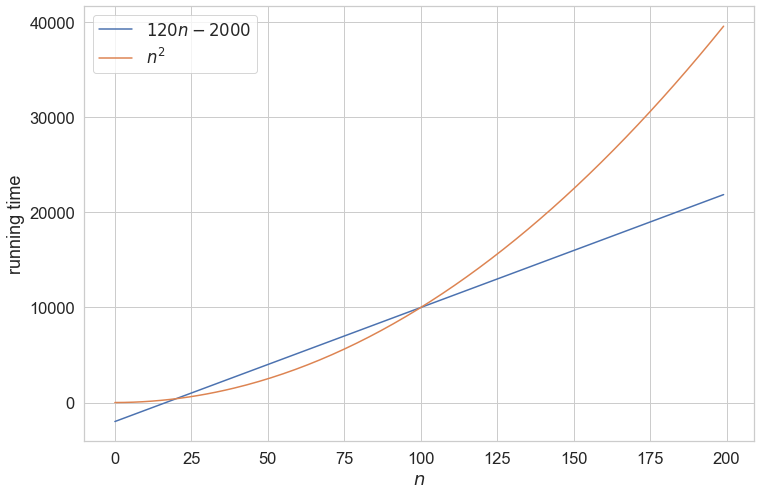

In [31]:
n = np.arange(200)
time1 = 120*n + - 2000
time2 = n*n

# plot
plt.figure()
plt.plot(n, time1, label='$120 n - 2000$')
plt.plot(n, time2, label='$n^2$')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

But, as $n \rightarrow \infty$, there will be a point at which algorithm 2 will be slower, **no matter which machine it is run on**


### Definition: Asymptotic dominance

Function $f(n)$ **asymptotically dominates** function $g(n)$ if **there exist** constants $c$ and $n_0$ such that

$ g(n) \le c \cdot f(n)$ **for all** $n \ge n_0$

<br><br>

e.g., $n^2$ asymptotically dominates $120 n - 2000$


**Proof:**

Find $c$ and $n_0$ such that

$120 n - 2000 \leq c*n^2$  for all $n>n_0$

<br>

Let $c=1$. Find an $n_0$ such that 

$
120 n - 2000 \leq n^2 \\
$
for all $n \ge n_0$

$
\begin{align}
120n - 2000 & \leq n^2 \\
0 & \leq n^2 - 120n + 2000\\
0 & \leq (n-100)(n-20)\\
\end{align}
$


When $n=100$, $120n - 2000 = n^2 $

For all $n \ge 100$, $120n - 2000 \le n^2 $

So, $c=1, n_0=100$ satisfies the definition of asymptotic dominance.

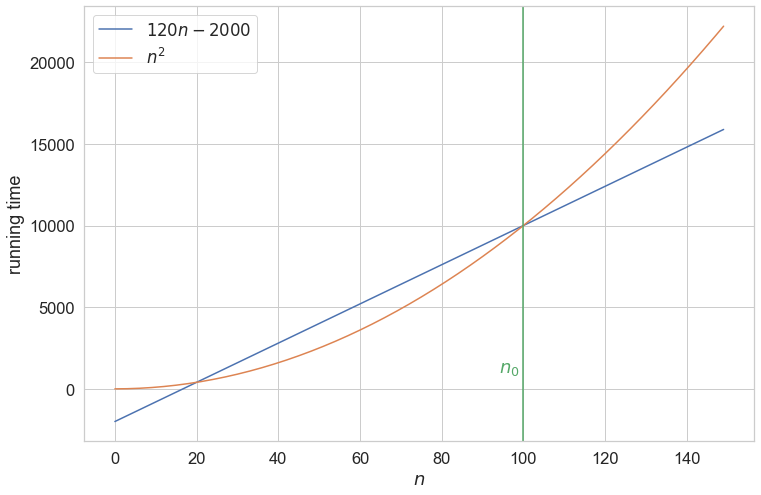

In [32]:
# show n_0
n = np.arange(150)
time1 = 120*n + - 2000
time2 = n*n

# plot
plt.figure()
plt.plot(n, time1, label='$120 n - 2000$')
plt.plot(n, time2, label='$n^2$')
plt.axvline(100, color='g')
plt.text(94,1000,'$n_0$', fontsize=18, color='g')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

## Asymptotic Notation

$
\begin{align}
\mathcal{O} (f(n)) & = \{ g(n) \mid f(n) \hbox{ asymptotically dominates } g(n)\}\\
\Omega (f(n)) & =  \{ g(n) \mid  g(n) \hbox{ asymptotically dominates } f(n)\}\\
\Theta (f(n)) & =  \mathcal{O} (f(n)) \cap \Omega (f(n))
\end{align}
$

e.g.

$120 n - 2000 \in \mathcal{O}(n^2)$

$ 10n^3 + 2n^2 - 100 \in \Omega(n^2) $

$ 14n^2 - 5n +50 \in \Theta(n^2) $


<br><br>
We often abuse notation such as

$120 n - 2000 = \mathcal{O}(n^2)$

or

$120 n - 2000 \mathrm{~is~} \mathcal{O}(n^2)$


<br><br>
Analogy:

|$\mathcal{O}~~~$ | $\Omega~~~$ | $\Theta~~~$ | $\mathcal{o}~~~$ | $\omega~~~$ |
|--------------|----------|----------|---------------|----------|
| $\leq~~~$       | $\geq~~~$   | $=~~~$      | $\lt~~~$         | $\gt~~~$    |    

## Course Overview

- Analyzing algorithms: methods to compute tight bounds on running time
- Designing algorithms: various approaches to designing efficient algorithms
  - lists, sequences, trees, graphs,...
- Distinct from typical courses like this, we will emphasize **parallel** algorithms from the start (next lecture)


## Navigating the course

- Canvas: syllabus, dates, grades
- Diderot: interactive textbook
- Github: assignments, slides
